Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [2]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from skimage import io
import os
import glob
import random
from skimage import transform


In [91]:
## If you are using the data by mounting the google drive, use the following :
from google.colab import drive
drive.mount('/content/gdrive')

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [117]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path("/content/gdrive/MyDrive/Data Science/Upgrad (IIITB) /Assignment CNN/Train")
data_dir_test = pathlib.Path('/content/gdrive/MyDrive/Data Science/Upgrad (IIITB) /Assignment CNN/Test')

In [5]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [6]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [7]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    batch_size=batch_size,
    image_size=(img_height, img_width),
    seed=123,
    validation_split=0.2,
    subset = "training"
)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [8]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    batch_size=batch_size,
    image_size=(img_height, img_width),
    seed=123,
    validation_split=0.2,
    subset = "validation"
)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [9]:
## Write your test dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_test,
    batch_size=batch_size,
    image_size=(img_height, img_width),
    seed=123
)

Found 118 files belonging to 9 classes.


In [10]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

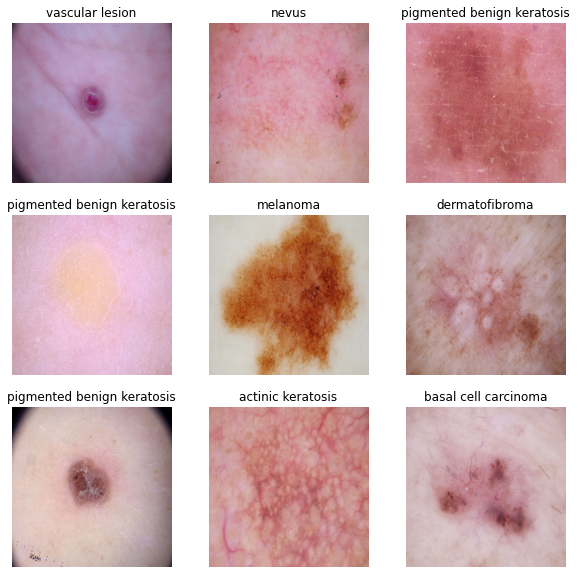

In [11]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [12]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [13]:
### Your code goes here
num_classes = 9

model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])

### Compile the model
Choose an appropirate optimiser and loss function for model training 

In [14]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### Train the model

In [15]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 647s 3s/step - loss: 1.9798 - accuracy: 0.2517 - val_loss: 1.8649 - val_accuracy: 0.3423
Epoch 2/20
56/56 [==============================] - 2s 30ms/step - loss: 1.7939 - accuracy: 0.3460 - val_loss: 1.6669 - val_accuracy: 0.4295
Epoch 3/20
56/56 [==============================] - 2s 29ms/step - loss: 1.5565 - accuracy: 0.4515 - val_loss: 1.4197 - val_accuracy: 0.5101
Epoch 4/20
56/56 [==============================] - 2s 29ms/step - loss: 1.4948 - accuracy: 0.4710 - val_loss: 1.4853 - val_accuracy: 0.4698
Epoch 5/20
56/56 [==============================] - 2s 29ms/step - loss: 1.3780 - accuracy: 0.5112 - val_loss: 1.3720 - val_accuracy: 0.5347
Epoch 6/20
56/56 [==============================] - 2s 28ms/step - loss: 1.2793 - accuracy: 0.5419 - val_loss: 1.3618 - val_accuracy: 0.5302
Epoch 7/20
56/56 [==============================] - 2s 29ms/step - loss: 1.2622 - accuracy: 0.5558 - val_loss: 1.4820 - val_accuracy: 0.5078
Epoch 8/20
56

### Visualizing training results

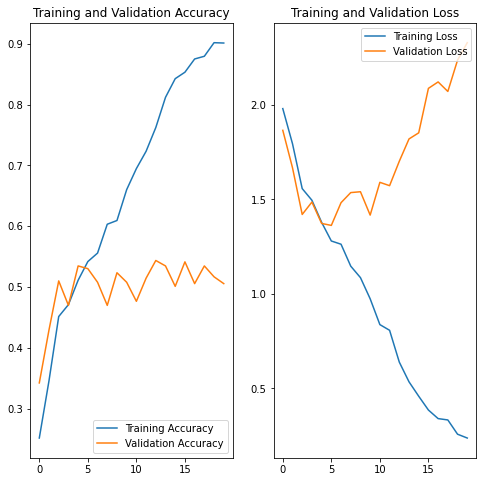

In [16]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Model has clearly overfitted based on the progression of Epochs, as we can visulize on the above plot the error tend to decrease on training data where as increase on the validation set. At 5th epoch we can see the global minima of Validation data.

### Write your findings here

In [17]:
def plot_image(images, captions=None, cmap=None ):
    f, axes = plt.subplots(1, len(images), sharey=True)
    f.set_figwidth(15)
    for ax,image in zip(axes, images):
        ax.imshow(image, cmap)

path = os.path.join(data_dir_train, class_names[1],"*")
print(path)

c_path = glob.glob(path)
print(c_path[0])

/content/gdrive/MyDrive/Data Science/Upgrad (IIITB) /Assignment CNN/Train/basal cell carcinoma/*
/content/gdrive/MyDrive/Data Science/Upgrad (IIITB) /Assignment CNN/Train/basal cell carcinoma/ISIC_0024665.jpg


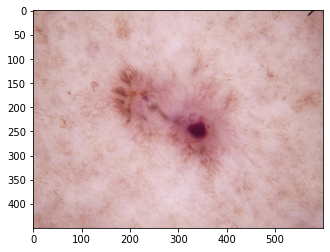

In [18]:
rand_index = random.randint(0, len(c_path))
image = io.imread(c_path[rand_index])
plt.imshow(image)

(450, 600, 3)


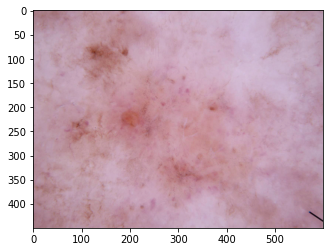

In [19]:
# plot a sample image
path = os.path.join(data_dir_train, class_names[1], '*')
path = glob.glob(path)

# access some element (a file) from the list
image = io.imread(path[120])
plt.imshow(image)
print(image.shape)

Text(0.5, 0.98, 'Different Channels of Image')

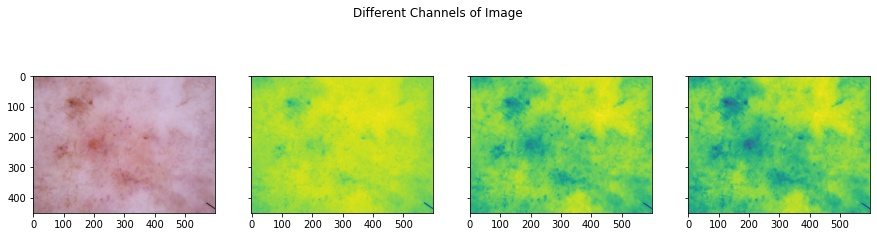

In [20]:
# plotting the original image and the RGB channels
f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, sharey=True)
f.set_figwidth(15)
ax1.imshow(image)

# RGB channels
ax2.imshow(image[:, : , 0])
ax3.imshow(image[:, : , 1])
ax4.imshow(image[:, : , 2])
f.suptitle('Different Channels of Image')

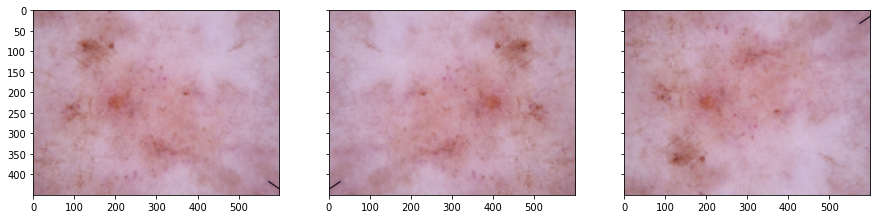

In [21]:
# flip left-right, up-down
image_flipr = np.fliplr(image)
image_flipud = np.flipud(image)

plot_image([image, image_flipr, image_flipud])

In [22]:
### Your code goes here

# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy. 
data_augmentation = tf.keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.2),
])

num_classes = 9

model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),
  data_augmentation,
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])

In [23]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [24]:
epochs = 50
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/50
56/56 [==============================] - 4s 56ms/step - loss: 1.8593 - accuracy: 0.2997 - val_loss: 1.6283 - val_accuracy: 0.4430
Epoch 2/50
56/56 [==============================] - 3s 53ms/step - loss: 1.5750 - accuracy: 0.4386 - val_loss: 1.4452 - val_accuracy: 0.4944
Epoch 3/50
56/56 [==============================] - 3s 54ms/step - loss: 1.4546 - accuracy: 0.4967 - val_loss: 1.6130 - val_accuracy: 0.4407
Epoch 4/50
56/56 [==============================] - 4s 72ms/step - loss: 1.4251 - accuracy: 0.4994 - val_loss: 1.4962 - val_accuracy: 0.4609
Epoch 5/50
56/56 [==============================] - 3s 52ms/step - loss: 1.4145 - accuracy: 0.4933 - val_loss: 1.4200 - val_accuracy: 0.5324
Epoch 6/50
56/56 [==============================] - 3s 52ms/step - loss: 1.3247 - accuracy: 0.5251 - val_loss: 1.3201 - val_accuracy: 0.5593
Epoch 7/50
56/56 [==============================] - 3s 52ms/step - loss: 1.2874 - accuracy: 0.5352 - val_loss: 1.3126 - val_accuracy: 0.5481
Epoch 8/50
56

Even with the implementation of the data augmentation we dont see any considerible improvement in the model. lets try to implement the dropout to see the model performance.

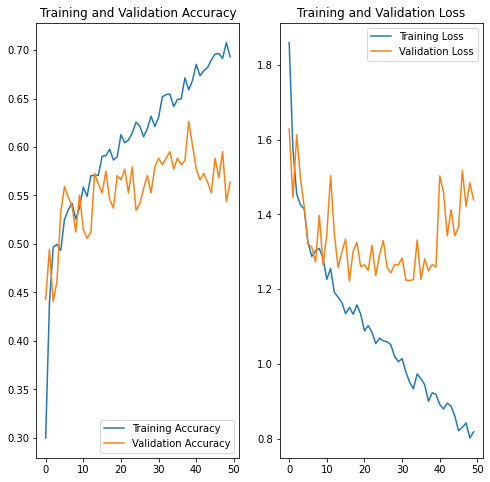

In [25]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Todo:
### Create the model, compile and train the model


In [30]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

## Your code goes here
data_augmentation = tf.keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.2),
])

num_classes = 9

model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Dropout(0.25),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Dropout(0.25),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])

### Compiling the model

In [31]:
## Your code goes here
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### Training the model

In [32]:
## Your code goes here, note: train your model for 20 epochs
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 3s 39ms/step - loss: 2.1317 - accuracy: 0.3036 - val_loss: 2.1755 - val_accuracy: 0.1499
Epoch 2/20
56/56 [==============================] - 2s 36ms/step - loss: 1.5246 - accuracy: 0.4777 - val_loss: 2.1504 - val_accuracy: 0.1499
Epoch 3/20
56/56 [==============================] - 2s 36ms/step - loss: 1.4045 - accuracy: 0.5145 - val_loss: 2.1372 - val_accuracy: 0.1499
Epoch 4/20
56/56 [==============================] - 2s 36ms/step - loss: 1.2846 - accuracy: 0.5480 - val_loss: 2.1485 - val_accuracy: 0.1499
Epoch 5/20
56/56 [==============================] - 2s 36ms/step - loss: 1.1736 - accuracy: 0.5876 - val_loss: 2.2321 - val_accuracy: 0.1588
Epoch 6/20
56/56 [==============================] - 2s 36ms/step - loss: 1.1235 - accuracy: 0.5988 - val_loss: 2.2608 - val_accuracy: 0.2237
Epoch 7/20
56/56 [==============================] - 2s 36ms/step - loss: 1.0385 - accuracy: 0.6267 - val_loss: 1.8626 - val_accuracy: 0.3311
Epoch 8/20
56

### Visualizing the results

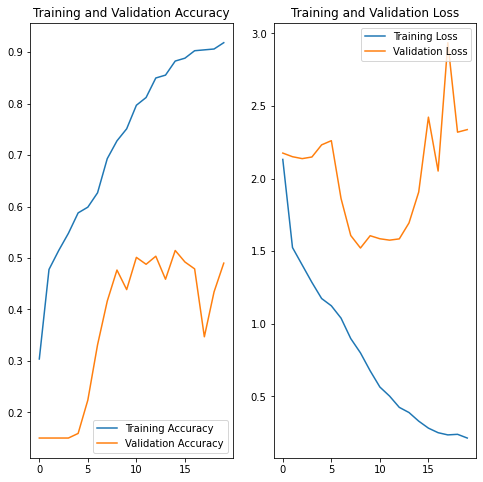

In [33]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)


plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?

#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [82]:
data_dir_train

['/content/gdrive/MyDrive/Data Science/Upgrad (IIITB) /Assignment CNN/Train/squamous cell carcinoma/output/squamous cell carcinoma_original_ISIC_0028232.jpg_ff9024e2-da87-4674-9649-c5da32593952.jpg',
 '/content/gdrive/MyDrive/Data Science/Upgrad (IIITB) /Assignment CNN/Train/squamous cell carcinoma/output/squamous cell carcinoma_original_ISIC_0026100.jpg_d5435162-8764-48e3-986e-1a1edfdbd5ee.jpg',
 '/content/gdrive/MyDrive/Data Science/Upgrad (IIITB) /Assignment CNN/Train/squamous cell carcinoma/output/squamous cell carcinoma_original_ISIC_0025811.jpg_63dab38e-b953-4d74-a10b-28525978e59a.jpg',
 '/content/gdrive/MyDrive/Data Science/Upgrad (IIITB) /Assignment CNN/Train/squamous cell carcinoma/output/squamous cell carcinoma_original_ISIC_0030991.jpg_6d689445-2d99-4044-a013-ed68c9c47671.jpg',
 '/content/gdrive/MyDrive/Data Science/Upgrad (IIITB) /Assignment CNN/Train/squamous cell carcinoma/output/squamous cell carcinoma_original_ISIC_0028795.jpg_0de33443-ac77-4f4b-a3c8-48d7c02a6ed3.jpg',


In [85]:
## Your code goes here.

class_size = {}

for name in class_names:
    class_size[name] = len(list(data_dir_train.glob(name+'/*.jpg')))

class_size

class_df = pd.DataFrame(class_size.items(),index=list(class_size), columns = ['ClassName', 'NumberOfSamples'])
class_df.drop(['ClassName'], axis = 1, inplace=True)
class_df

,NumberOfSamples
actinic keratosis,114
basal cell carcinoma,376
dermatofibroma,95
melanoma,438
nevus,357
pigmented benign keratosis,462
seborrheic keratosis,77
squamous cell carcinoma,181
vascular lesion,139


#### **Todo:** Write your findings here: 
#### - Which class has the least number of samples?
#### - Which classes dominate the data in terms proportionate number of samples?


#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [34]:
!pip install Augmentor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [88]:
data_dir_train

PosixPath('/content/gdrive/MyDrive/Data Science/Upgrad (IIITB) /Assignment CNN/Train')

In [126]:
path_to_training_dataset = data_dir_train
output = "/content/Working/"
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(str(path_to_training_dataset) +'/'+ i, output_directory="/content/Working/" +i+'/output/')
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to /content/Working/actinic keratosis/output/.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FC4A47D2950>: 100%|██████████| 500/500 [00:18<00:00, 27.35 Samples/s]


Initialised with 376 image(s) found.
Output directory set to /content/Working/basal cell carcinoma/output/.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7FC4AC9E16D0>: 100%|██████████| 500/500 [00:18<00:00, 27.22 Samples/s]


Initialised with 95 image(s) found.
Output directory set to /content/Working/dermatofibroma/output/.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7FC4AD23A410>: 100%|██████████| 500/500 [00:21<00:00, 23.74 Samples/s]


Initialised with 438 image(s) found.
Output directory set to /content/Working/melanoma/output/.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=3072x2304 at 0x7FC4ACA0B2D0>: 100%|██████████| 500/500 [01:23<00:00,  6.01 Samples/s]


Initialised with 357 image(s) found.
Output directory set to /content/Working/nevus/output/.

Processing <PIL.Image.Image image mode=RGB size=3072x2304 at 0x7FC4ACA0BD90>: 100%|██████████| 500/500 [01:41<00:00,  4.93 Samples/s]


Initialised with 462 image(s) found.
Output directory set to /content/Working/pigmented benign keratosis/output/.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FC520029D50>: 100%|██████████| 500/500 [00:17<00:00, 27.98 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /content/Working/seborrheic keratosis/output/.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x7FC4AD24F710>: 100%|██████████| 500/500 [00:45<00:00, 10.94 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/Working/squamous cell carcinoma/output/.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FC4B0BCC4D0>: 100%|██████████| 500/500 [00:17<00:00, 27.93 Samples/s]


Initialised with 139 image(s) found.
Output directory set to /content/Working/vascular lesion/output/.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FC4AE8DF490>: 100%|██████████| 500/500 [00:18<00:00, 27.69 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [129]:
output =  pathlib.Path("/content/Working/")
mage_count_train = len(list(output.glob('*/output/*.jpg')))
print(image_count_train)

10920


### Lets see the distribution of augmented data after adding new images to the original training data.

In [130]:
path_list = [x for x in glob.glob(os.path.join(output, '*','output', '*.jpg'))]
path_list

['/content/Working/seborrheic keratosis/output/seborrheic keratosis_original_ISIC_0011040.jpg_939aae54-4715-44f6-9eee-2378cb6cfd7d.jpg',
 '/content/Working/seborrheic keratosis/output/seborrheic keratosis_original_ISIC_0011039.jpg_e8862461-d8e6-4441-9f21-17c31283d635.jpg',
 '/content/Working/seborrheic keratosis/output/seborrheic keratosis_original_ISIC_0010990.jpg_e80ddde2-3f3c-466a-b644-4c56cfe79e69.jpg',
 '/content/Working/seborrheic keratosis/output/seborrheic keratosis_original_ISIC_0011140.jpg_a4a18211-15dd-4cd0-b1df-b13b6452246c.jpg',
 '/content/Working/seborrheic keratosis/output/seborrheic keratosis_original_ISIC_0010876.jpg_604153ab-79cc-4c2f-8647-027defa074b6.jpg',
 '/content/Working/seborrheic keratosis/output/seborrheic keratosis_original_ISIC_0010995.jpg_7185310a-5245-4c08-bff4-c82640048de1.jpg',
 '/content/Working/seborrheic keratosis/output/seborrheic keratosis_original_ISIC_0010978.jpg_c36de3da-0f2a-4d7e-81b6-9b3f15016844.jpg',
 '/content/Working/seborrheic keratosis/o

In [131]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob.glob(os.path.join(output, '*','output', '*.jpg'))]
lesion_list_new

['seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',


In [132]:
dataframe_dict_new = dict(zip(path_list, lesion_list_new))

In [133]:
original_df = pd.DataFrame()
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
new_df = original_df.append(df2)

In [134]:
new_df['Label'].value_counts()

seborrheic keratosis          500
squamous cell carcinoma       500
actinic keratosis             500
melanoma                      500
dermatofibroma                500
nevus                         500
pigmented benign keratosis    500
basal cell carcinoma          500
vascular lesion               500
Name: Label, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [135]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [136]:
output_dir =  pathlib.Path("/content/Working/")

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  output_dir,
  seed=123,
  validation_split = 0.2,
  subset = "training",
  image_size = (img_height, img_width),
  batch_size=batch_size)

Found 4500 files belonging to 9 classes.
Using 3600 files for training.


#### **Todo:** Create a validation dataset

In [138]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  output_dir,
  seed=123,
  validation_split = 0.2,
  subset = "validation",
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 4500 files belonging to 9 classes.
Using 900 files for validation.


#### **Todo:** Create your model (make sure to include normalization)

In [139]:
## your code goes here

from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Flatten, Dense, Dropout, BatchNormalization
num_classes = 9

# Model - Rescaling -> Conv2D -> MaxPooling2D -> Dropout -> Conv2D -> MaxPooling2D -> Dropout -> Conv2D -> MaxPooling2D -> Dropout -> Dense -> Dense
model = Sequential()
model.add(layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)))
model.add(Conv2D(16, 3, padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.25))

model.add(Conv2D(32, 3, padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.25))

model.add(Conv2D(64, 3, padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dense(num_classes))

#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [141]:
## your code goes here
model.compile(optimizer='adam',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

#### **Todo:**  Train your model

In [142]:
epochs = 30
## Your code goes here, use 50 epochs.
history = history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30
113/113 [==============================] - 15s 111ms/step - loss: 2.1649 - accuracy: 0.1442 - val_loss: 2.1634 - val_accuracy: 0.1778
Epoch 2/30
113/113 [==============================] - 13s 107ms/step - loss: 1.7097 - accuracy: 0.3150 - val_loss: 1.6143 - val_accuracy: 0.3800
Epoch 3/30
113/113 [==============================] - 13s 108ms/step - loss: 1.4287 - accuracy: 0.4714 - val_loss: 1.5192 - val_accuracy: 0.4178
Epoch 4/30
113/113 [==============================] - 13s 111ms/step - loss: 1.3027 - accuracy: 0.5267 - val_loss: 1.4183 - val_accuracy: 0.4878
Epoch 5/30
113/113 [==============================] - 14s 112ms/step - loss: 1.1801 - accuracy: 0.5667 - val_loss: 1.2488 - val_accuracy: 0.5600
Epoch 6/30
113/113 [==============================] - 13s 106ms/step - loss: 1.0833 - accuracy: 0.6075 - val_loss: 1.1683 - val_accuracy: 0.5789
Epoch 7/30
113/113 [==============================] - 13s 107ms/step - loss: 0.9647 - accuracy: 0.6600 - val_loss: 1.0718 - val_ac

#### **Todo:**  Visualize the model results

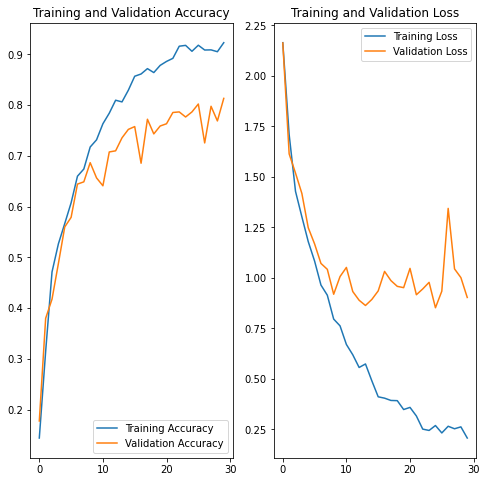

In [143]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?



Based on the rebalences data set we can see significant improvement in the model performence

In [144]:
test_dataset = tf.keras.preprocessing.image_dataset_from_directory(data_dir_test, image_size=(img_height, img_width), 
                                           batch_size=batch_size)
test_dataset = test_dataset.prefetch(buffer_size=AUTOTUNE)

Found 118 files belonging to 9 classes.


Predictions:
 [0 0 0 1 1 1 1 0 0 1 1 0 0 1 1 0 1 0 1 0 0 0 1 1 0 0 0 0 0 0 1 1 1 0 0 0 0
 0 1 0 1 1 0 1 0 1 1 0 1 1 1 0 0 0 1 1 0 0 1 1 0 0 0 1 0 0 1 0 1 0 0 0 1 0
 0 1 1 0 1 1 1 0 0 0 1 1 1 0 0 0 1 1 0 1 1 1 1 0 0 0 1 0 1 1 1 1 1 0 1 1 0
 1 1 1 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 0 0 0 1 1 0 1 1 1 0 1 0 1 1 0 1
 0 0 0 1 0 1 1 0 0 1 1 0 1 0 0 0 0 1 1 1 0 0 0 1 1 1 0 1 1 0 1 0 0 0 0 1 1
 1 1 0 0 0 0 0 1 1 1 1 1 0 0 0 0 1 1 1 1 0 0 1 0 0 1 1 1 1 0 0 1 0 0 1 1 1
 1 1 0 0 0 0 1 1 1 1 0 0 0 1 0 1 1 1 1 0 0 0 1 0 1 0 0 1 1 0 1 0 0 1 1 1 1
 0 0 1 1 0 0 0 0 1 0 0 0 0 0 1 1 1 1 0 0 0 0 0 1 1 1 0 0 0]
Labels:
 [3 0 1 4 7 0 8 5 5 4 7 7 2 7 0 6 0 5 2 0 7 2 2 3 3 3 7 5 1 1 4 4]


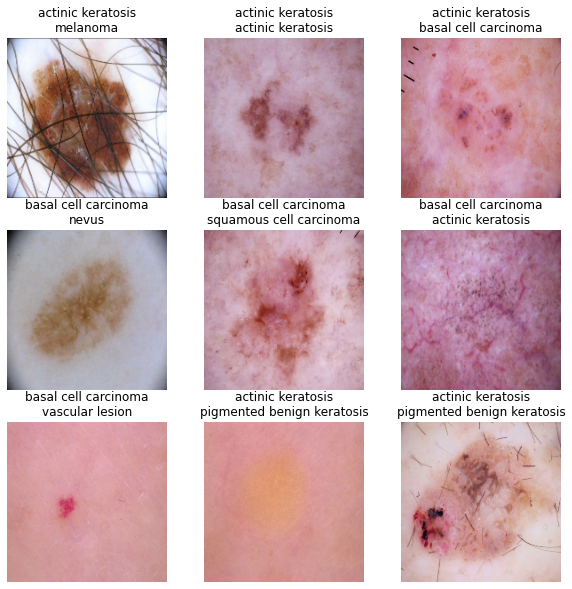

In [145]:
#Retrieve a batch of images from the test set
image_batch, label_batch = test_dataset.as_numpy_iterator().next()
predictions = model.predict_on_batch(image_batch).flatten()

# Apply a sigmoid since our model returns logits
predictions = tf.nn.sigmoid(predictions)
predictions = tf.where(predictions < 0.5, 0, 1)

print('Predictions:\n', predictions.numpy())
print('Labels:\n', label_batch)

plt.figure(figsize=(10, 10))
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(image_batch[i].astype("uint8"))
    plt.title(class_names[predictions[i]] + "\n" + class_names[label_batch[i]])
    plt.axis("off")